In [ ]:
!pip install --quiet --upgrade tensorflow
# !pip install tensorflow_datasets

# import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# tfds works in both Eager and Graph modes
# tf.compat.v1.enable_eager_execution()

# See available datasets
print(tfds.list_builders())

# Construct a tf.data.Dataset
dataset = tfds.load(name="emnist", split=tfds.Split.TRAIN)

dataset
# Build your input pipeline


['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'bair_robot_pushing_small', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'esnli', 'eurosat', 'fashion_mnist', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'i_naturalist2017', 'image_label_folder', 'imagenet2012', 'imagenet2012_corrupted', 'imagenet_resized', 'imdb_reviews', 'iris'

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/1.0.1. Subsequent calls will reuse this data.


<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [ ]:
dataset = dataset.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
for features in dataset.take(1):
  image, label = features["image"], features["label"]

tf.Tensor([28 28  1], shape=(3,), dtype=int32)
tf.Tensor(53, shape=(), dtype=int64)
Label: 53


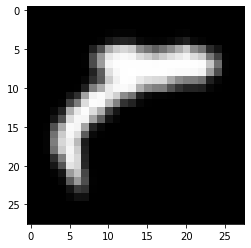

In [ ]:
for mnist_example in dataset.take(1):  # Only take a single example
  image, label = mnist_example["image"], mnist_example["label"]

  print(tf.shape(mnist_example["image"]))
  print(mnist_example["label"])
  plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
  print("Label: %d" % label.numpy())

In [ ]:
mnist_train = dataset.repeat().shuffle(1024).batch(32)

# prefetch will enable the input pipeline to asynchronously fetch batches while
# your model is training.
mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
for features in mnist_train.take():
  image, label = features["image"], features["label"]

In [ ]:
!pip install --quiet --upgrade tensorflow
import tensorflow as tf

In [ ]:
def create_compiled_keras_model():
  model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Conv2D(128, kernel_size = 4, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(10, activation='softmax')
      ])
  
  model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
  return model

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model = create_compiled_keras_model()

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])  # Pass callback to training